#### El objetivo es clasificar con un Random Forest los datos obtenidos a partir de una simulación no lineal que se encuentran en el fichero "ejemplo_dataset".

#### Con el mismo set de datos que en el ejemplo, crea un modelo Random Forest con diferentes hiperparámetros y compara los resultados con el del ejemplo.

#### Cargamos las librerías necesarias

In [15]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Métricas
# ==============================================================================
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

#### Creamos y visualizamos el set de datos

In [2]:
# Datos
# ==============================================================================
df = pd.read_csv("ejemplo_dataset.csv")
df.head()


,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


Text(0.5, 1.0, 'Datos ESL.mixture')

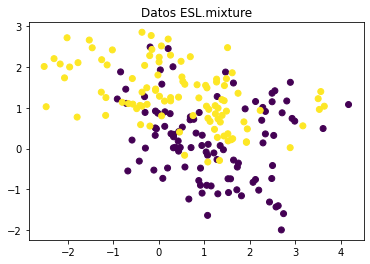

In [3]:
plt.scatter(df["X1"], df["X2"], c=df.y)
plt.title("Datos ESL.mixture")

#### Dividimos los datos en el set de entrenamiento y de test.

In [4]:
X = df.drop(columns = 'y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                    )

### Ejemplo Random Forest

#### Creamos y entrenamos el modelo Random Forest

In [5]:
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

#### Clasificamos con el algoritmo entrenado los datos de test.

In [18]:
predictions = rf.predict(X_test)
predictions

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

#### Creamos la matriz de confusión

In [20]:
conf_matrix = metrics.confusion_matrix (y_test, predictions)
conf_matrix

array([[13,  4],
       [ 1, 22]], dtype=int64)

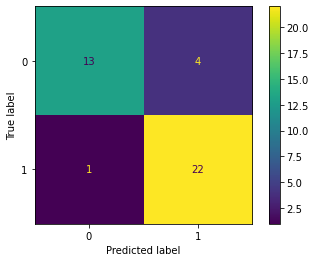

In [21]:
plot_confusion_matrix (rf, X_test, y_test)

#### Visualizamos las métricas

In [26]:
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score (y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)
precision, recall, accuracy, f1

(0.8461538461538461, 0.9565217391304348, 0.875, 0.8979591836734695)

#### Modelo 2

In [47]:
rf2 = RandomForestClassifier(n_estimators = 5, max_depth = 6, random_state=123)
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=5, random_state=123)

In [44]:
predictions2 = rf2.predict(X_test)

In [45]:
conf_matrix = metrics.confusion_matrix (y_test, predictions2)
conf_matrix

array([[14,  3],
       [ 2, 21]], dtype=int64)

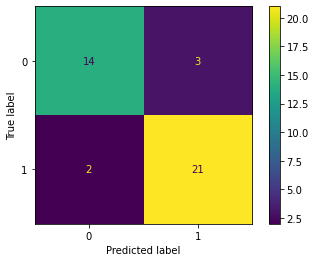

In [46]:
plot_confusion_matrix (rf2, X_test, y_test)

In [42]:
precision_2 = metrics.precision_score(y_test, predictions2)
recall_2 = metrics.recall_score (y_test, predictions2)
accuracy_2 = metrics.accuracy_score(y_test, predictions2)
f1_2 = metrics.f1_score(y_test, predictions2)
precision_2, recall_2, accuracy_2, f1_2

(0.875, 0.9130434782608695, 0.875, 0.8936170212765957)

### Resultados

In [50]:
results = pd.DataFrame ({"precision" : [precision, precision_2],
                        "recall" : [recall, recall_2],
                         "accuracy" : [accuracy, accuracy_2],
                         "f1" : [f1, f1_2]},
                       index = ["Modelo1", "Modelo2"])
results.round(4)

,precision,recall,accuracy,f1
Modelo1,0.8462,0.9565,0.875,0.8980
Modelo2,0.8750,0.9130,0.875,0.8936


### Conclusiones

#### Si lo que importa es la precisión, es decir minizar el número de falsos positivos, nos quedaremos con el modelo que tenga mayor precisión, en este caso, el primer modelo. Sin embargo, si lo que nos importa es minimizar los falsos negativos, elegiremos el modelo con mayor sensibilidad (con la tasa más baja de falsos negativos). Las otras dos métricas, exactitud y f1, son muy parecidas.